In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ICT Project/twitter_data.csv')

In [ ]:
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ‰ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [ ]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

The dataset contains the following fields:


unitid: a unique id for user

_golden: whether the user was included in the gold standard for the model; TRUE or FALSE

unitstate: state of the observation; one of finalized (for contributor-judged) or golden (for gold standard observations)

trustedjudgments: number of trusted judgments (int); always 3 for non-golden, and what may be a unique id for gold standard observations

lastjudgment_at: date and time of last contributor judgment; blank for gold standard observations

gender: one of male, female, or brand (for non-human profiles)

gender:confidence: a float representing confidence in the provided gender

profile_yn: "no" here seems to mean that the profile was meant to be part of the dataset but was not available when contributors went to judge it

profile_yn:confidence: confidence in the existence/non-existence of the profile

created: date and time when the profile was created

description: the user's profile description

fav_number: number of tweets the user has favorited

gender_gold: if the profile is golden, what is the gender?

link_color: the link color on the profile, as a hex value

name: the user's name

profileyngold: whether the profile y/n value is golden

profileimage: a link to the profile image

retweet_count: number of times the user has retweeted (or possibly, been retweeted)

sidebar_color: color of the profile sidebar, as a hex value

text: text of a random one of the user's tweets

tweet_coord: if the user has location turned on, the coordinates as a string with the format "[latitude, longitude]"

tweet_count: number of tweets that the user has posted

tweet_created: when the random tweet (in the text column) was created

tweet_id: the tweet id of the random tweet

tweet_location: location of the tweet; seems to not be particularly normalized

user_timezone: the timezone of the user



In [ ]:
data.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [ ]:
#Checking for null values
data.isna().sum().sort_values(ascending=False)

gender_gold              20000
profile_yn_gold          20000
tweet_coord              19891
user_timezone             7798
tweet_location            7484
description               3744
gender                      97
_last_judgment_at           50
gender:confidence           26
profileimage                 0
tweet_id                     0
tweet_created                0
tweet_count                  0
text                         0
sidebar_color                0
retweet_count                0
_unit_id                     0
name                         0
_golden                      0
fav_number                   0
created                      0
profile_yn:confidence        0
profile_yn                   0
_trusted_judgments           0
_unit_state                  0
link_color                   0
dtype: int64

In [ ]:
#Number of unique values in each column
data.nunique()

_unit_id                 20050
_golden                      2
_unit_state                  2
_trusted_judgments          32
_last_judgment_at          283
gender                       4
gender:confidence          923
profile_yn                   2
profile_yn:confidence      267
created                  18699
description              15140
fav_number                6784
gender_gold                  6
link_color                3001
name                     18795
profile_yn_gold              1
profileimage             17164
retweet_count               22
sidebar_color              561
text                     18412
tweet_coord                146
tweet_count              14280
tweet_created                5
tweet_id                     2
tweet_location            7864
user_timezone              156
dtype: int64

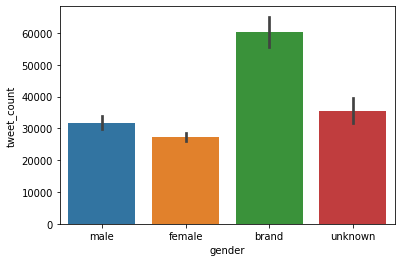

In [ ]:
sns.barplot (x = 'gender', y = 'tweet_count',data = data)

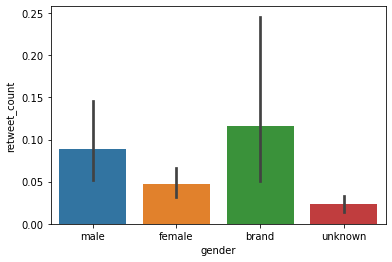

In [ ]:
sns.barplot (x = 'gender', y = 'retweet_count',data = data)

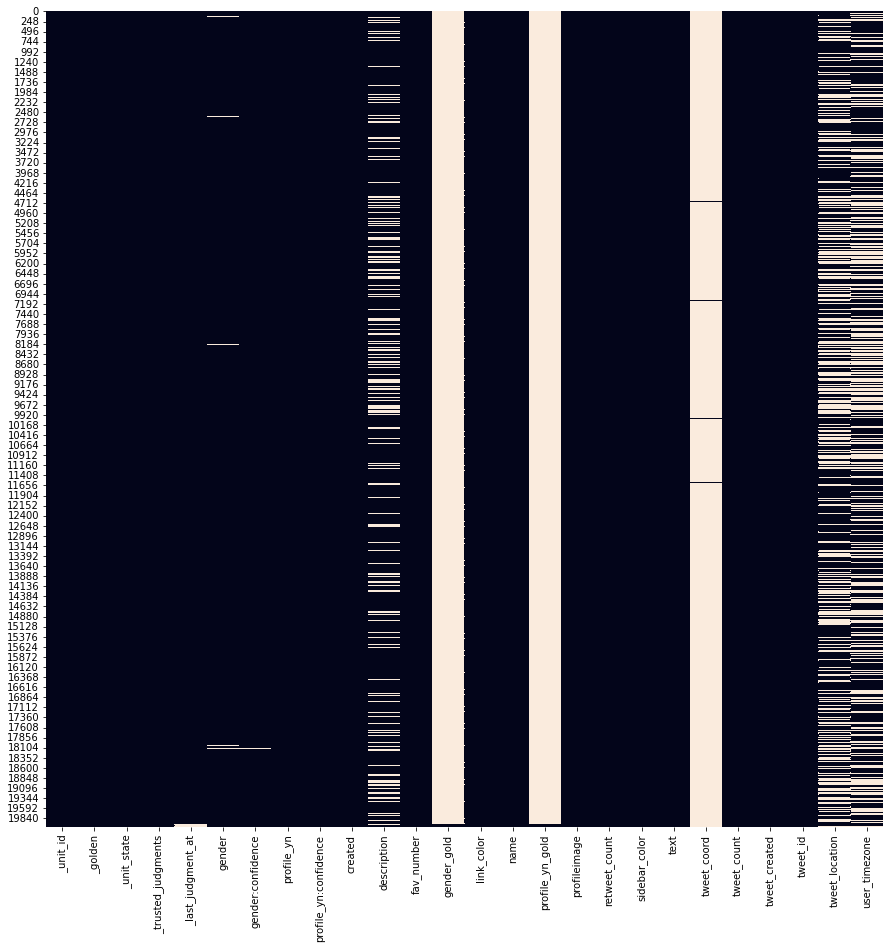

In [ ]:
# Visualizing null values to get a better idea of the dataset & it's trends
plt.subplots(figsize=(15,15))
sns.heatmap(data.isnull(), cbar=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


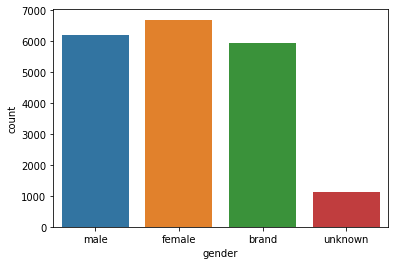

In [ ]:
sns.countplot(data['gender'])

In [ ]:
#we take gender,link_color,sidebar_color,text,description for our classification problem
dat=pd.concat([data.gender,data.link_color,data.sidebar_color,data.text,data.description],axis=1)

In [ ]:
#Dropping all values other than 'male', 'female', 'brand' from the dependent variable 'gender'
dat.drop(dat[(dat['gender'] != 'male') & (dat['gender'] != 'female') & (dat['gender'] != 'brand')].index, inplace = True)

In [ ]:
dat['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

# Feature Engineering

In [ ]:
#concatinating text, description
dat['text_data']=dat['text'].str.cat(dat['description'],sep=' ')

In [ ]:
#dropping description,text since we combined it to text_data
dat=dat.drop(['description','text'],axis=1)

In [ ]:
dat.head()

,gender,link_color,sidebar_color,text_data
0,male,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...
1,male,0084B4,C0DEED,‰ÛÏIt felt like they were my friends and I was...
2,male,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...
3,male,0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,female,3B94D9,0,Watching Neighbours on Sky+ catching up with t...


# PREPROCESSING OF TEXT DATA

In [ ]:
#convert all text_data to lower case.
dat['preprocessed_text']=dat['text_data'].apply(lambda x:" ".join(x.lower() for x in str(x).split()))

In [ ]:
#Remove the HTML tags and URLs from the text.
dat['preprocessed_text']=dat['preprocessed_text'].apply(lambda x: BeautifulSoup(x).get_text())
dat['preprocessed_text']=dat['preprocessed_text'].apply(lambda x: re.sub(r"http\S+", "", x))

In [ ]:
#Perform the Contractions on the text.
#Example: it won’t be converted as it will not be
def contractions(s):
    s = re.sub(r"won't", "will not",s)
    s = re.sub(r"would't", "would not",s)
    s = re.sub(r"could't", "could not",s)
    s = re.sub(r"\'d", "would",s)
    s = re.sub(r"can\'t", "can not",s)
    s = re.sub(r"n\'t", "not", s)
    s= re.sub(r"\'re", "are", s)
    s = re.sub(r"\'s", "is", s)
    s = re.sub(r"\'ll", "will", s)
    s = re.sub(r"\'t", "not", s)
    s = re.sub(r"\'ve", "have", s)
    s = re.sub(r"\'m", "am", s)
    return s
dat['preprocessed_text']=dat['preprocessed_text'].apply(lambda x:contractions(x))

In [ ]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Remove non-alpha characters
dat['preprocessed_text']=dat['preprocessed_text'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [ ]:
#Remove extra spaces between the words
dat['preprocessed_text']=dat['preprocessed_text'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
dat

,gender,link_color,sidebar_color,text_data,preprocessed_text
0,male,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...,robbie e responds to critics after win against...
1,male,0084B4,C0DEED,‰ÛÏIt felt like they were my friends and I was...,it felt like they were my friends and i was li...
2,male,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...,i absolutely adore when louis starts the songs...
3,male,0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,hi jordanspieth looking at the url do you use ...
4,female,3B94D9,0,Watching Neighbours on Sky+ catching up with t...,watching neighbours on sky catching up with th...
...,...,...,...,...,...
20045,female,0084B4,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",lookupondeath fine and iwill drink tea too i ...
20046,male,CFB929,0,Greg Hardy you a good player and all but don't...,greg hardy you a good player and all but donot...
20047,male,0084B4,C0DEED,You can miss people and still never want to se...,you can miss people and still never want to se...
20048,female,9266CC,0,@bitemyapp i had noticed your tendency to pee ...,bitemyapp i had noticed your tendency to pee ...


In [ ]:
#Removing stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
dat['preprocessed_text']=dat['preprocessed_text'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dat

,gender,link_color,sidebar_color,text_data,preprocessed_text
0,male,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...,robbie e responds critics win eddie edwards wo...
1,male,0084B4,C0DEED,‰ÛÏIt felt like they were my friends and I was...,felt like friends living story retired ian iam...
2,male,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...,absolutely adore louis starts songs hits hard ...
3,male,0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,hi jordanspieth looking url use ifttt donot ty...
4,female,3B94D9,0,Watching Neighbours on Sky+ catching up with t...,watching neighbours sky catching neighbs xxx x...
...,...,...,...,...,...
20045,female,0084B4,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",lookupondeath fine iwill drink tea love rp
20046,male,CFB929,0,Greg Hardy you a good player and all but don't...,greg hardy good player donot get face dez brya...
20047,male,0084B4,C0DEED,You can miss people and still never want to se...,miss people still never want see teambarcelona...
20048,female,9266CC,0,@bitemyapp i had noticed your tendency to pee ...,bitemyapp noticed tendency pee carpet didnot w...


In [ ]:
#Perform lemmatization using the wordnet lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
dat['preprocessed_text']=dat['preprocessed_text'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


# VISUALISING MOST FREQUENT WORDS

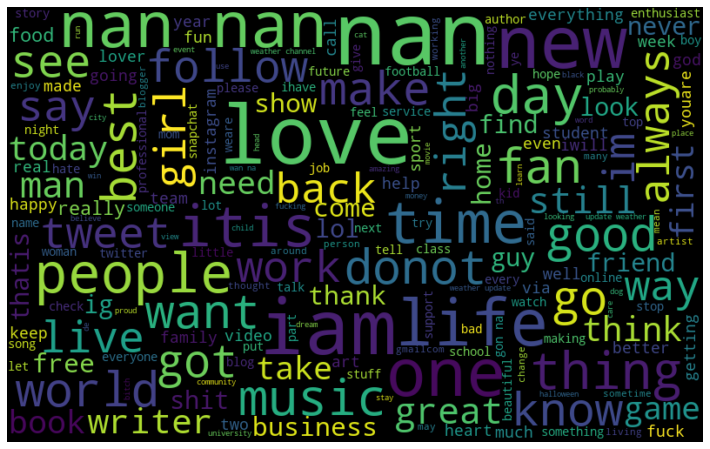

In [ ]:
all_words = " ".join([sentence for sentence in dat['preprocessed_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Color attribute analysis

Text(0.5, 1.0, 'Sidebar color of MALE')

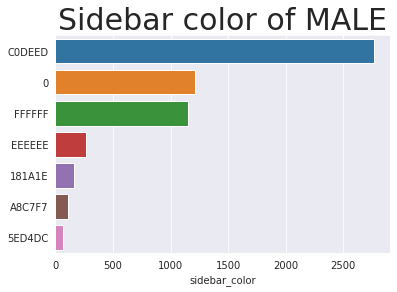

In [ ]:
male_sidebar_color = dat[dat['gender'] == 'male']['sidebar_color'].value_counts().head(7)
male_sidebar_color_idx = male_sidebar_color.index
male_top_color = male_sidebar_color_idx.values


sns.set_style("darkgrid")
sns.barplot (x = male_sidebar_color, y = male_top_color).set_title('Sidebar color of MALE', fontdict = { 'fontsize': 30})

Text(0.5, 1.0, 'Sidebar color of FEMALE')

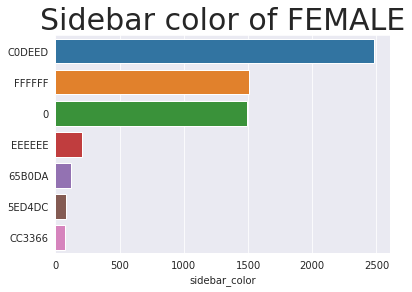

In [ ]:
female_sidebar_color =dat[dat['gender'] == 'female']['sidebar_color'].value_counts().head(7)
female_sidebar_color_idx = female_sidebar_color.index
female_top_color = female_sidebar_color_idx.values

sns.set_style("darkgrid")
sns.barplot (x = female_sidebar_color, y = female_top_color).set_title('Sidebar color of FEMALE', fontdict = { 'fontsize': 30})

Text(0.5, 1.0, 'Sidebar color of BRAND')

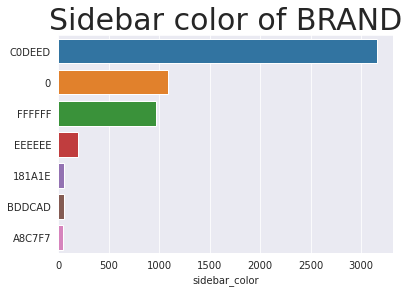

In [ ]:
brand_sidebar_color =dat[dat['gender'] == 'brand']['sidebar_color'].value_counts().head(7)
brand_sidebar_color_idx = brand_sidebar_color.index
brand_top_color = brand_sidebar_color_idx.values

sns.set_style("darkgrid")
sns.barplot (x = brand_sidebar_color, y = brand_top_color).set_title('Sidebar color of BRAND', fontdict = { 'fontsize': 30})

Text(0.5, 1.0, 'Linkcolor of MALE')

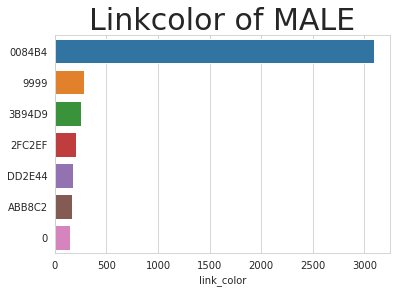

In [ ]:
male_link_color = dat[dat['gender'] == 'male']['link_color'].value_counts().head(7)
male_link_color_idx = male_link_color.index
male_top_color = male_link_color_idx.values

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = male_link_color, y = male_link_color_idx).set_title('Linkcolor of MALE', fontdict = { 'fontsize': 30})

Text(0.5, 1.0, 'Linkcolor of FEMALE')

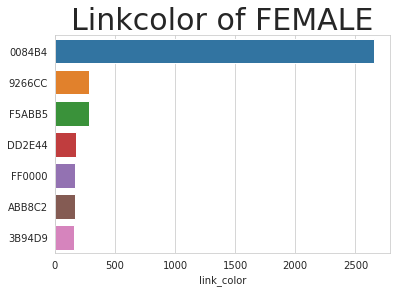

In [ ]:
female_link_color = dat[dat['gender'] == 'female']['link_color'].value_counts().head(7)
female_link_color_idx = female_link_color.index
female_top_color = female_link_color_idx.values

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = female_link_color, y = female_link_color_idx).set_title('Linkcolor of FEMALE', fontdict = { 'fontsize': 30})

Text(0.5, 1.0, 'Linkcolor of BRAND')

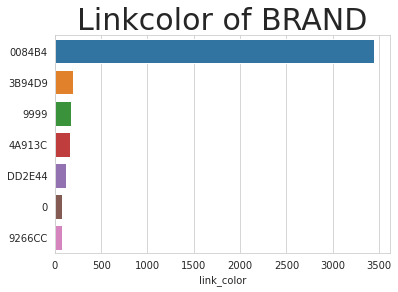

In [ ]:
brand_link_color = dat[dat['gender'] == 'brand']['link_color'].value_counts().head(7)
brand_link_color_idx = brand_link_color.index
brand_top_color = brand_link_color_idx.values

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = brand_link_color, y = brand_link_color_idx).set_title('Linkcolor of BRAND', fontdict = { 'fontsize': 30})

As seen from plots displayed above, most users have not changed the default color of their side bar and link color. Obviously, these attributes are not significant in gender classification

### Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(dat['preprocessed_text'], dat['gender'], test_size=0.25, random_state=30)
print("Train: ",x_train.shape,y_train.shape,"Test: ",(x_test.shape,y_test.shape))

Train:  (14127,) (14127,) Test:  ((4709,), (4709,))


#### TFIDF Vectorisation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(x_train)
tf_x_test = vectorizer.transform(x_test)

### Support Vector Machine (SVM) Model

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(tf_x_train,y_train)
y_test_pred=clf.predict(tf_x_test)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_test_pred,output_dict=True)
report

{'accuracy': 0.5844128265024421,
 'brand': {'f1-score': 0.66147859922179,
  'precision': 0.5972972972972973,
  'recall': 0.7411133467471496,
  'support': 1491},
 'female': {'f1-score': 0.5794507867941994,
  'precision': 0.6173570019723866,
  'recall': 0.5459302325581395,
  'support': 1720},
 'macro avg': {'f1-score': 0.5800747224660726,
  'precision': 0.5812674271108215,
  'recall': 0.5865579176233474,
  'support': 4709},
 'male': {'f1-score': 0.4992947813822285,
  'precision': 0.5291479820627802,
  'recall': 0.472630173564753,
  'support': 1498},
 'weighted avg': {'f1-score': 0.5799242996891675,
  'precision': 0.5829449969829731,
  'recall': 0.5844128265024421,
  'support': 4709}}

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,solver='saga')
clf.fit(tf_x_train,y_train)
y_test_pred=clf.predict(tf_x_test)

In [ ]:
report=classification_report(y_test, y_test_pred,output_dict=True)
report

{'accuracy': 0.5899341686132937,
 'brand': {'f1-score': 0.6695278969957082,
  'precision': 0.616600790513834,
  'recall': 0.7323943661971831,
  'support': 1491},
 'female': {'f1-score': 0.585956416464891,
  'precision': 0.6111111111111112,
  'recall': 0.5627906976744186,
  'support': 1720},
 'macro avg': {'f1-score': 0.5863302082736827,
  'precision': 0.5859975171836966,
  'recall': 0.5914969349531952,
  'support': 4709},
 'male': {'f1-score': 0.5035063113604488,
  'precision': 0.5302806499261448,
  'recall': 0.47930574098798395,
  'support': 1498},
 'weighted avg': {'f1-score': 0.5861889116921142,
  'precision': 0.5871359743802511,
  'recall': 0.5899341686132937,
  'support': 4709}}